## Import libraries

In [167]:
import os
from os import listdir
import shutil
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

## Define constants

In [168]:
DATASET_PATH = "../res/dataset/"
PATHS = {"train": DATASET_PATH+"train/", "val": DATASET_PATH+"val/", "test": DATASET_PATH+"test/"}
PATH_LABELS = {"normal": "NORMAL/", "bacteria": "BACTERIA/", "virus": "VIRUS/", "pneumonia": "PNEUMONIA/"}

LABELS = [item.lower() for item in os.listdir(PATHS["train"])]

## Load the data

### Utility functions

In [169]:
def separate_pneuomia_classes(dir):
    # Create the 2 folders "BACTERIA", "VIRUS"
    pneumonia_dir = dir+PATH_LABELS["pneumonia"]
    bacteria_dir = dir+PATH_LABELS["bacteria"]
    virus_dir = dir+PATH_LABELS["virus"]
    
    if os.path.exists(bacteria_dir) or os.path.exists(virus_dir):
        return
    else:
        os.mkdir(bacteria_dir)
        os.mkdir(virus_dir)
    
    for f in listdir(pneumonia_dir):
        shutil.move(pneumonia_dir+f, virus_dir if "virus" in f else bacteria_dir)
        
    shutil.rmtree(pneumonia_dir)

def get_images_number_in_dir(dir):
    return sum([len(files) for r, d, files in os.walk(dir)])

In [170]:
separate_pneuomia_classes(PATHS["train"])
separate_pneuomia_classes(PATHS["val"])
separate_pneuomia_classes(PATHS["test"])

BATCH_SIZE = 32
image_count = get_images_number_in_dir(PATHS["train"])
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

COLOR_MODE = "grayscale"
CLASS_MODE = "categorical"
RESCALE = 1./255

datagen = ImageDataGenerator(rescale=RESCALE)

train_generator = datagen.flow_from_directory(PATHS["train"], batch_size=BATCH_SIZE, color_mode=COLOR_MODE, class_mode=CLASS_MODE)
val_generator = datagen.flow_from_directory(PATHS["val"], batch_size=BATCH_SIZE, color_mode=COLOR_MODE, class_mode=CLASS_MODE)
test_generator = datagen.flow_from_directory(PATHS["test"], batch_size=BATCH_SIZE, color_mode=COLOR_MODE, class_mode=CLASS_MODE)

Found 5216 images belonging to 3 classes.
Found 16 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


### Show batch

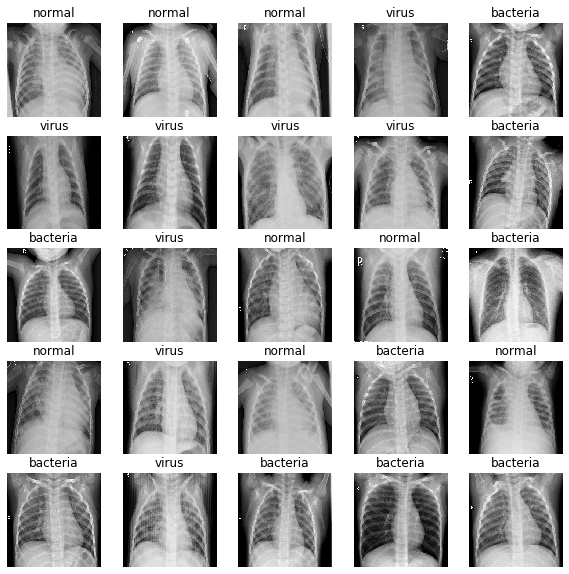

In [171]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n][:,:,0], cmap="gray")
      plt.title(LABELS[(label_batch[n]==1).tolist().index(True)])
      plt.axis('off')
      
image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch)

## Model